# Importação Pacotes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from os.path import expanduser as ospath
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Leitura dos Dados

In [2]:
def logReturn(series):
    return np.log(series/series.shift(1))

In [3]:
def readData(file):
    df = pd.read_excel(ospath(os.getcwd() + '/data/Curva Forward/' + file), index_col=0, skiprows=[0,1,2], header = None)
    df.columns = ['date', 'price']
    df["date"] = pd.to_datetime(df["date"])
    df['logReturn'] = logReturn(df.price)
    return df

In [4]:
data = {'M1': '2019-03-01_15-12-06_Evolucao_historica_da__Media__na_serie_M__1_na_fonte_Convencional_SE_.xlsx' ,
        'M2': '2019-03-01_15-15-00_Evolucao_historica_da__Media__na_serie_M__2_na_fonte_Convencional_SE_.xlsx',
        'M3': '2019-03-01_15-15-12_Evolucao_historica_da__Media__na_serie_M__3_na_fonte_Convencional_SE_.xlsx' ,
        'A0': '2019-03-01_15-16-21_Evolucao_historica_da__Media__na_serie_A__0_na_fonte_Convencional_SE_.xlsx',
        'A1': '2019-03-01_15-16-32_Evolucao_historica_da__Media__na_serie_A__1_na_fonte_Convencional_SE_.xlsx', 
        'A2': '2019-03-01_15-16-45_Evolucao_historica_da__Media__na_serie_A__2_na_fonte_Convencional_SE_.xlsx',
        'A3': '2019-03-01_15-16-58_Evolucao_historica_da__Media__na_serie_A__3_na_fonte_Convencional_SE_.xlsx',
        'A4': '2019-03-01_15-17-12_Evolucao_historica_da__Media__na_serie_A__4_na_fonte_Convencional_SE_.xlsx'}

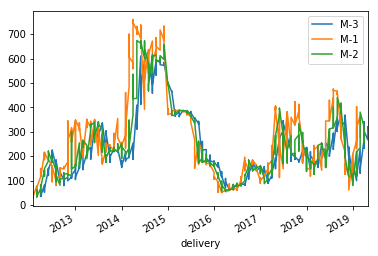

In [40]:
from dateutil.relativedelta import *
M1 = readData(data['M1'])
M1.price = M1.price.interpolate()
M1['delivery'] = M1.date.apply(lambda x: x + relativedelta(months=+1)) 
M1.set_index(M1.date, inplace=True, drop=True)
M1 = M1[['price', 'delivery']]

M2 = readData(data['M2'])
M2.price = M2.price.interpolate()
M2['delivery'] = M2.date.apply(lambda x: x + relativedelta(months=+2)) 
M2.set_index(M2.date, inplace=True, drop=True)
M2 = M2[['price', 'delivery']]

M3 = readData(data['M3'])
M3.price = M3.price.interpolate()
M3['delivery'] = M3.date.apply(lambda x: x + relativedelta(months=+3)) 
M3.set_index(M3.date, inplace=True, drop=True)
M3 = M3[['price', 'delivery']]

monthly_delivery_price = pd.merge(M3,pd.merge(M1, M2, left_on='delivery',right_on='delivery',how='outer',suffixes=('M1','M2'))
, left_on='delivery',right_on='delivery',how='outer')


monthly_delivery_price.set_index(monthly_delivery_price.delivery, inplace=True, drop=True)
monthly_delivery_price = monthly_delivery_price.drop(['delivery'], axis=1)
monthly_delivery_price = monthly_delivery_price.rename(columns={"price": "M-3", "priceM1": "M-1", 'priceM2': 'M-2'})
monthly_delivery_price.plot(label= 'a')


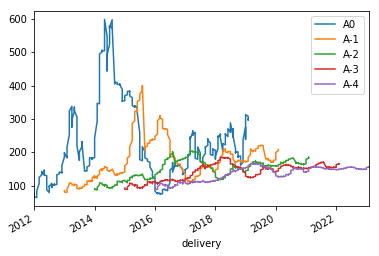

In [49]:
from dateutil.relativedelta import *
A0 = readData(data['A0'])
A0.price = A0.price.interpolate()
A0['delivery'] = A0.date 
A0.set_index(A0.date, inplace=True, drop=True)
A0 = A0[['price', 'delivery']]

A1 = readData(data['A1'])
A1.price = A1.price.interpolate()
A1['delivery'] = A1.date.apply(lambda x: x + relativedelta(years=+1)) 
A1.set_index(A1.date, inplace=True, drop=True)
A1 = A1[['price', 'delivery']]

A2 = readData(data['A2'])
A2.price = A2.price.interpolate()
A2['delivery'] = A2.date.apply(lambda x: x + relativedelta(years=+2)) 
A2.set_index(A2.date, inplace=True, drop=True)
A2 = A2[['price', 'delivery']]

A3 = readData(data['A3'])
A3.price = A3.price.interpolate()
A3['delivery'] = A3.date.apply(lambda x: x + relativedelta(years=+3)) 
A3.set_index(A3.date, inplace=True, drop=True)
A3 = A3[['price', 'delivery']]

A4 = readData(data['A4'])
A4.price = A4.price.interpolate()
A4['delivery'] = A4.date.apply(lambda x: x + relativedelta(years=+4)) 
A4.set_index(A4.date, inplace=True, drop=True)
A4 = A4[['price', 'delivery']]

yearly_delivery_price =  pd.merge(A0, pd.merge(pd.merge(A1, A2, left_on='delivery',right_on='delivery',how='outer',suffixes=('A1','A2')),pd.merge(A3, A4, left_on='delivery',right_on='delivery',how='outer',suffixes=('A3','A4'))
, left_on='delivery',right_on='delivery',how='outer'), left_on='delivery',right_on='delivery',how='outer',suffixes=('A0',''))


yearly_delivery_price.set_index(yearly_delivery_price.delivery, inplace=True, drop=True)
yearly_delivery_price = yearly_delivery_price.drop(['delivery'], axis=1)
yearly_delivery_price = yearly_delivery_price.rename(columns={"price": "A0", "priceA1": "A-1", 'priceA2': 'A-2', 'priceA3': 'A-3','priceA4': 'A-4'})
yearly_delivery_price.plot(label= 'a')


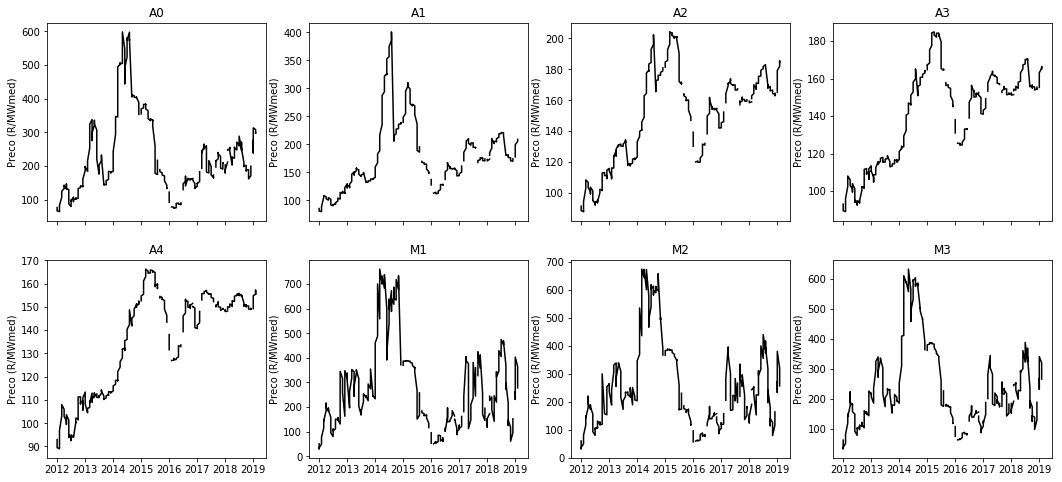

In [8]:
k = 0
products = sorted(data.keys())
fig, ax = plt.subplots(2, 4, sharex='col', figsize = (18,8))
for i in range(2):
    for j in range(4):
        df = readData(data[products[k]])
        ax[i, j].plot(df.date,df.price, 'k')
        ax[i, j].set_title(products[k])
        ax[i,j].set(ylabel='Preco (R/MWmed)')
        k = k + 1
        
fig.savefig(ospath(os.getcwd() + '/figs/priceSeries.png'))


# Sasonalidade

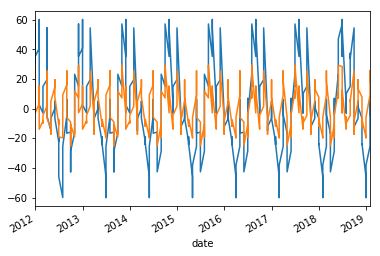

In [76]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = M1.price
result = seasonal_decompose(series, model='additive', freq=48)
#print(result.seasonal)
result.seasonal.plot()

series = M2.price
result = seasonal_decompose(series, model='additive', freq=48)
#print(result.seasonal)
result.seasonal.plot()


# Análise Retornos

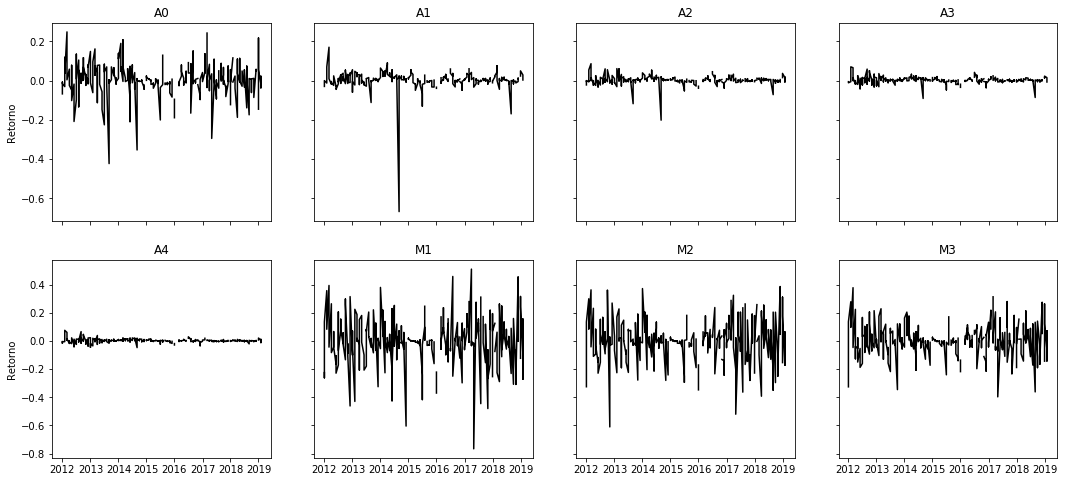

In [9]:
k = 0
products = sorted(data.keys())
fig, ax = plt.subplots(2, 4, sharex='col', sharey='row', figsize = (18,8))
for i in range(2):
    for j in range(4):
        df = readData(data[products[k]])
        ax[i, j].plot(df.date,df.logReturn, 'k')
        ax[i, j].set_title(products[k])
        ax[i,0].set(ylabel='Retorno')
        k = k + 1
        
fig.savefig(ospath(os.getcwd() + '/figs/returnSeries.png'))

## Estatísticas Descritivas

In [10]:
ret = {'date': df.date}
for key in data.keys():
    df = readData(data[key])
    ret[key] = logReturn(df.price.interpolate())

Returns = pd.DataFrame(ret)
Returns.set_index(Returns.date, inplace=True, drop=True)
Returns = Returns.dropna()
Returns.head()

,date,M1,M2,M3,A0,A1,A2,A3,A4
date,,,,,,,,,
2012-01-01,2012-01-01,-0.225476,-0.325524,-0.326160,-0.067593,-0.029676,-0.022100,-0.005391,-0.005391
2012-01-01,2012-01-01,-0.262091,-0.245578,-0.256332,-0.050190,-0.018238,-0.005602,-0.010870,-0.010870
2012-01-01,2012-01-01,-0.025508,-0.047962,-0.026790,-0.007380,-0.006154,0.000000,-0.010989,-0.016529
2012-01-01,2012-01-01,0.134318,0.133760,0.135659,-0.014926,0.000000,-0.005634,-0.011111,-0.005571
2012-02-01,2012-02-01,0.356501,0.298700,0.277670,-0.030537,-0.012423,0.000000,-0.005602,-0.005602


In [11]:
Returns.describe()

,M1,M2,M3,A0,A1,A2,A3,A4
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,0.004575,0.003868,0.003843,0.003647,0.002394,0.001879,0.001541,0.001377
std,0.159030,0.133822,0.104732,0.074848,0.044889,0.020494,0.015049,0.012779
min,-0.765861,-0.610410,-0.397172,-0.422569,-0.667080,-0.201472,-0.090943,-0.047779
25%,-0.058296,-0.044262,-0.039495,-0.017764,-0.006440,-0.003418,-0.003554,-0.003594
50%,0.001730,0.001896,0.000278,0.002376,0.002581,0.001862,0.001916,0.001013
75%,0.078704,0.062419,0.048514,0.039320,0.016514,0.009377,0.007277,0.006596
max,0.509190,0.385698,0.377432,0.247982,0.170075,0.086129,0.070110,0.074901


## Correlações

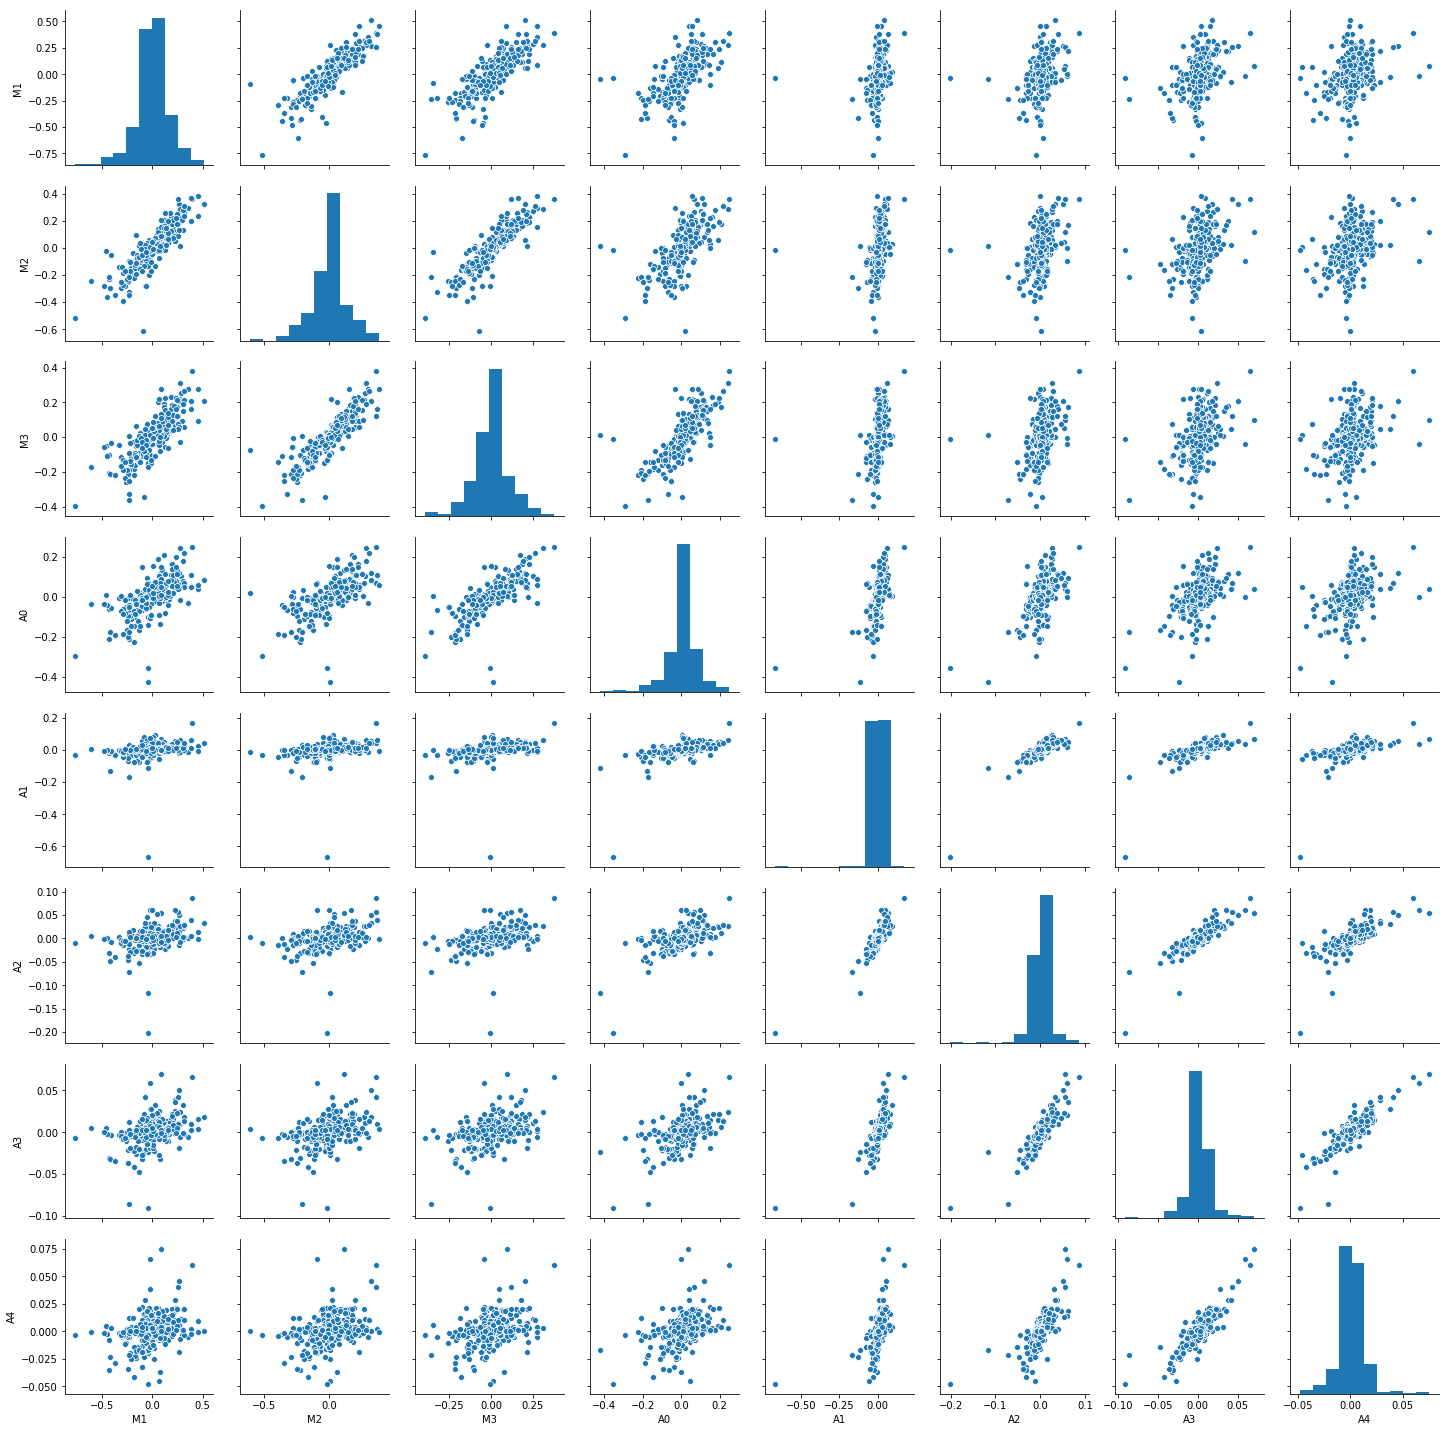

In [15]:
import seaborn as sns
fig = sns.pairplot(Returns)
fig.savefig("correlationPlot.png")



In [13]:
Returns.corr()


,M1,M2,M3,A0,A1,A2,A3,A4
M1,1.000000,0.863085,0.796667,0.634011,0.278095,0.334943,0.352165,0.299033
M2,0.863085,1.000000,0.864676,0.663985,0.300962,0.357733,0.379113,0.331382
M3,0.796667,0.864676,1.000000,0.749715,0.337892,0.389670,0.435046,0.353928
A0,0.634011,0.663985,0.749715,1.000000,0.571328,0.595437,0.518877,0.435211
A1,0.278095,0.300962,0.337892,0.571328,1.000000,0.842539,0.709232,0.551783
A2,0.334943,0.357733,0.389670,0.595437,0.842539,1.000000,0.856041,0.733624
A3,0.352165,0.379113,0.435046,0.518877,0.709232,0.856041,1.000000,0.865931
A4,0.299033,0.331382,0.353928,0.435211,0.551783,0.733624,0.865931,1.000000


## Autocorrelações

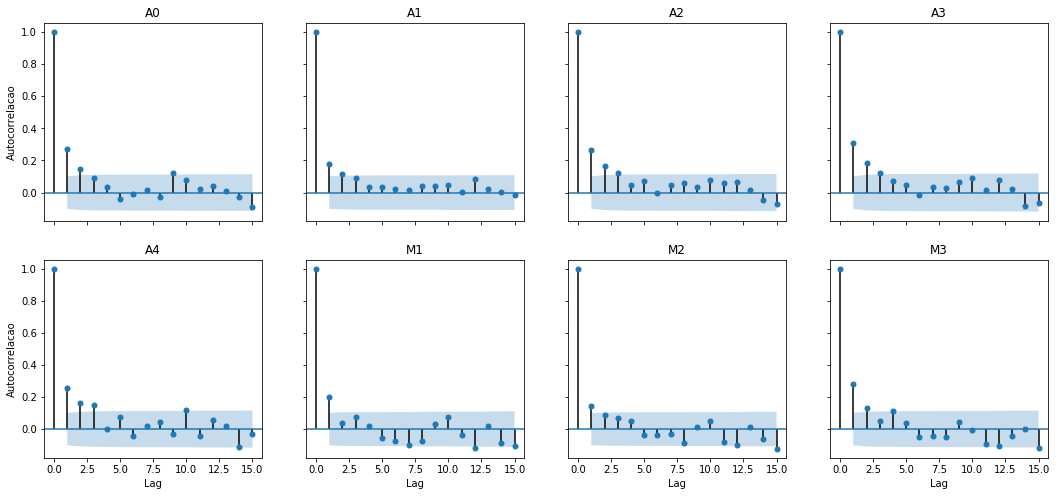

In [16]:
from statsmodels.graphics.tsaplots import plot_acf

k = 0

products = sorted(data.keys())
fig, ax = plt.subplots(2, 4, sharex='col', sharey='row', figsize = (18,8))
for i in range(2):
    for j in range(4):
        plot = plot_acf(Returns[products[k]], lags = 15, ax = ax[i, j])
        ax[i, j].set_title(products[k])
        ax[i,0].set(ylabel='Autocorrelacao')
        ax[1,j].set(xlabel='Lag')
        k = k + 1
        
fig.savefig(ospath(os.getcwd() + '/figs/acf.png'))

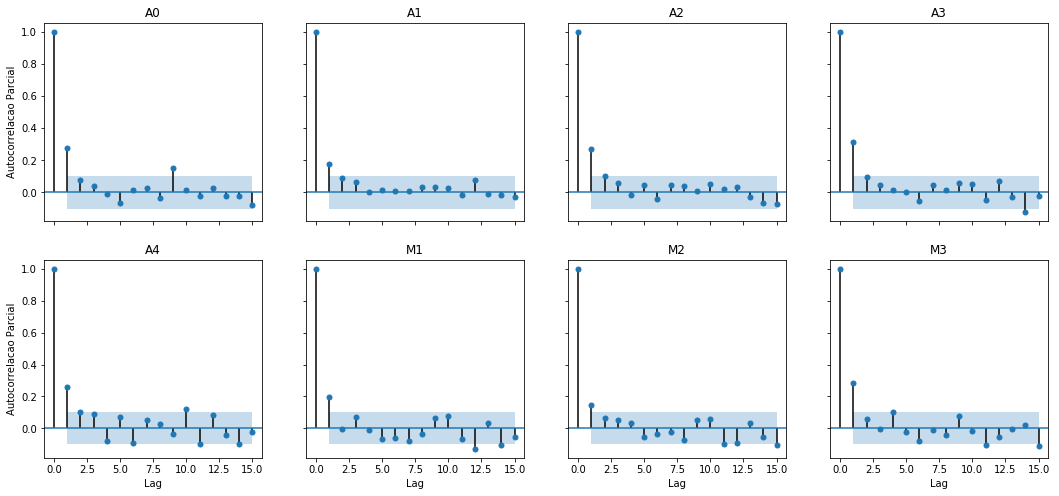

In [17]:
from statsmodels.graphics.tsaplots import plot_pacf
k = 0

products = sorted(data.keys())
fig, ax = plt.subplots(2, 4, sharex='col', sharey='row', figsize = (18,8))
for i in range(2):
    for j in range(4):
        plot = plot_pacf(Returns[products[k]], lags = 15, ax = ax[i, j])
        ax[i, j].set_title(products[k])
        ax[i,0].set(ylabel='Autocorrelacao Parcial')
        ax[1,j].set(xlabel='Lag')
        k = k + 1
        
fig.savefig(ospath(os.getcwd() + '/figs/pacf.png'))

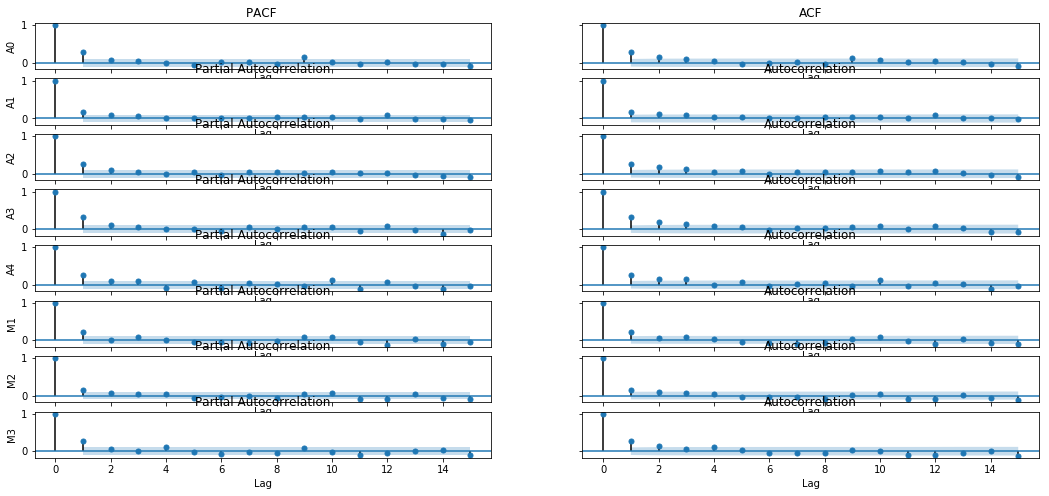

In [18]:
k=0
products = sorted(data.keys())
fig, ax = plt.subplots(8, 2, sharex='col', sharey='row', figsize = (18,8))
for i in range(8):
        plot1 = plot_pacf(Returns[products[k]], lags = 15, ax = ax[i, 0])
        plot2 = plot_acf(Returns[products[k]], lags = 15, ax = ax[i, 1])
        ax[i,0].set(ylabel=products[k])
        ax[i,0].set(xlabel='Lag')
        ax[i,1].set(xlabel='Lag')
        k = k + 1

        
ax[0, 0].set_title('PACF ')
ax[0, 1].set_title('ACF')

fig.savefig(ospath(os.getcwd() + '/figs/pacf_acf.png'))

# Escolha dos modelos ARMA

In [20]:
import statsmodels.tsa.api as smt


In [22]:
for k in data.keys():
    best_aic = np.inf 
    best_order = None
    best_mdl = None


    a = np.empty([3,4])

    for i in range(1,3):
        for j in range(1,4):
            warnings.filterwarnings('ignore')
            try:
                tmp_mdl = smt.ARMA(Returns[k], order=(i, j)).fit(
                    method='mle', trend='nc'
                )
                tmp_aic = tmp_mdl.aic
                a[i,j] = tmp_aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, j)
                    best_mdl = tmp_mdl
            except: continue

    print(k)
    print('Best aic: {:6.5f} | order: {}'.format(best_aic, best_order))


M1
Best aic: -326.86021 | order: (2, 1)
M2
Best aic: -447.05565 | order: (1, 1)
M3
Best aic: -652.94374 | order: (1, 1)
A0
Best aic: -901.48288 | order: (1, 1)
A1
Best aic: -1267.21233 | order: (1, 1)
A2
Best aic: -1868.41243 | order: (1, 1)
A3
Best aic: -2107.56753 | order: (1, 1)
A4
Best aic: -2218.66541 | order: (1, 1)


# Testes de Heterocedasticidade Resíduos

In [23]:
from statsmodels.stats.diagnostic import het_arch
from statsmodels.stats.diagnostic import het_white


In [26]:
A0 = smt.ARMA(Returns.A0, order=(1, 1)).fit(
    method='mle', trend='nc')
print('p-value Engle: ' + str(het_arch(A0.resid)[1]))
print(A0.pvalues)
A0.summary()

p-value Engle: 0.8590186336602714
ar.L1.A0    0.000124
ma.L1.A0    0.069183
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                     A0   No. Observations:                  373
Model:                     ARMA(1, 1)   Log Likelihood                 453.741
Method:                           mle   S.D. of innovations              0.072
Date:                Fri, 08 Nov 2019   AIC                           -901.483
Time:                        13:58:18   BIC                           -889.718
Sample:                             0   HQIC                          -896.811
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.A0       0.5386      0.139      3.879      0.000       0.266       0.811
ma.L1.A0      -0.2863      0.157     -1.823      0.069      -0.594       0.022
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.8568           +0.0000j            1.8568            0.0000
MA.1            3.4925           +0.0000j            3.4925            0.0000
-----------------------------------------------------------------------------
"""

In [27]:
A1 = smt.ARMA(Returns.A1, order=(1, 1)).fit(
    method='mle', trend='nc')
print('p-value Engle: ' + str(het_arch(A1.resid)[1]))
print(A1.pvalues)
A1.summary()

p-value Engle: 0.9999999999960347
ar.L1.A1    0.000031
ma.L1.A1    0.005369
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                     A1   No. Observations:                  373
Model:                     ARMA(1, 1)   Log Likelihood                 636.606
Method:                           mle   S.D. of innovations              0.044
Date:                Fri, 08 Nov 2019   AIC                          -1267.212
Time:                        13:58:29   BIC                          -1255.448
Sample:                             0   HQIC                         -1262.541
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.A1       0.6966      0.165      4.219      0.000       0.373       1.020
ma.L1.A1      -0.5441      0.194     -2.801      0.005      -0.925      -0.163
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4356           +0.0000j            1.4356            0.0000
MA.1            1.8380           +0.0000j            1.8380            0.0000
-----------------------------------------------------------------------------
"""

In [28]:
A2 = smt.ARMA(Returns.A2, order=(1, 1)).fit(
    method='mle', trend='nc')
print('p-value Engle: ' + str(het_arch(A2.resid)[1]))
print(A2.pvalues)
A2.summary()

p-value Engle: 0.9999962731994367
ar.L1.A2    2.088388e-07
ma.L1.A2    5.243661e-03
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                     A2   No. Observations:                  373
Model:                     ARMA(1, 1)   Log Likelihood                 937.206
Method:                           mle   S.D. of innovations              0.020
Date:                Fri, 08 Nov 2019   AIC                          -1868.412
Time:                        13:58:36   BIC                          -1856.648
Sample:                             0   HQIC                         -1863.741
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.A2       0.6599      0.125      5.291      0.000       0.415       0.904
ma.L1.A2      -0.4248      0.151     -2.808      0.005      -0.721      -0.128
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5155           +0.0000j            1.5155            0.0000
MA.1            2.3541           +0.0000j            2.3541            0.0000
-----------------------------------------------------------------------------
"""

In [29]:
A3 = smt.ARMA(Returns.A2, order=(1, 1)).fit(
    method='mle', trend='nc')
print('p-value Engle: ' + str(het_arch(A3.resid)[1]))
print(A3.pvalues)
A3.summary()

p-value Engle: 0.9999962731994367
ar.L1.A2    2.088388e-07
ma.L1.A2    5.243661e-03
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                     A2   No. Observations:                  373
Model:                     ARMA(1, 1)   Log Likelihood                 937.206
Method:                           mle   S.D. of innovations              0.020
Date:                Fri, 08 Nov 2019   AIC                          -1868.412
Time:                        13:58:41   BIC                          -1856.648
Sample:                             0   HQIC                         -1863.741
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.A2       0.6599      0.125      5.291      0.000       0.415       0.904
ma.L1.A2      -0.4248      0.151     -2.808      0.005      -0.721      -0.128
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5155           +0.0000j            1.5155            0.0000
MA.1            2.3541           +0.0000j            2.3541            0.0000
-----------------------------------------------------------------------------
"""

In [30]:
A4 = smt.ARMA(Returns.A4, order=(1, 1)).fit(
    method='mle', trend='nc')
print('p-value Engle: ' + str(het_arch(A4.resid)[1]))
print(A4.pvalues)
A4.summary()

p-value Engle: 3.130107836806424e-11
ar.L1.A4    1.703229e-08
ma.L1.A4    1.908967e-03
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                     A4   No. Observations:                  373
Model:                     ARMA(1, 1)   Log Likelihood                1112.333
Method:                           mle   S.D. of innovations              0.012
Date:                Fri, 08 Nov 2019   AIC                          -2218.665
Time:                        13:58:44   BIC                          -2206.901
Sample:                             0   HQIC                         -2213.994
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.A4       0.6594      0.114      5.767      0.000       0.435       0.884
ma.L1.A4      -0.4276      0.137     -3.126      0.002      -0.696      -0.160
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5165           +0.0000j            1.5165            0.0000
MA.1            2.3389           +0.0000j            2.3389            0.0000
-----------------------------------------------------------------------------
"""

In [31]:
M1 = smt.ARMA(Returns.M1, order=(2, 1)).fit(
    method='mle', trend='nc')
print('p-value Engle: ' + str(het_arch(M1.resid)[1]))
print(M1.pvalues)
M1.summary()

p-value Engle: 0.0898631709567866
ar.L1.M1     1.157609e-38
ar.L2.M1     1.196737e-03
ma.L1.M1    4.520741e-272
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                     M1   No. Observations:                  373
Model:                     ARMA(2, 1)   Log Likelihood                 167.430
Method:                           mle   S.D. of innovations              0.154
Date:                Fri, 08 Nov 2019   AIC                           -326.860
Time:                        13:58:49   BIC                           -311.174
Sample:                             0   HQIC                          -320.631
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.M1      -0.7653      0.052    -14.654      0.000      -0.868      -0.663
ar.L2.M1       0.1693      0.052      3.265      0.001       0.068       0.271
ma.L1.M1       0.9879      0.010    101.408      0.000       0.969       1.007
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0587           +0.0000j            1.0587            0.5000
AR.2            5.5783           +0.0000j            5.5783            0.0000
MA.1           -1.0123           +0.0000j            1.0123            0.5000
-----------------------------------------------------------------------------
"""

In [32]:
M2 = smt.ARMA(Returns.M2, order=(1, 1)).fit(
    method='mle', trend='nc')
print('p-value Engle: ' + str(het_arch(M2.resid)[1]))
print(M2.pvalues)
M2.summary()

p-value Engle: 0.1754485227249692
ar.L1.M2    0.001089
ma.L1.M2    0.022159
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                     M2   No. Observations:                  373
Model:                     ARMA(1, 1)   Log Likelihood                 226.528
Method:                           mle   S.D. of innovations              0.132
Date:                Fri, 08 Nov 2019   AIC                           -447.056
Time:                        13:58:52   BIC                           -435.291
Sample:                             0   HQIC                          -442.384
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.M2       0.5812      0.177      3.292      0.001       0.235       0.927
ma.L1.M2      -0.4418      0.192     -2.297      0.022      -0.819      -0.065
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7207           +0.0000j            1.7207            0.0000
MA.1            2.2635           +0.0000j            2.2635            0.0000
-----------------------------------------------------------------------------
"""

In [33]:
M3 = smt.ARMA(Returns.M3, order=(1, 1)).fit(
    method='mle', trend='nc')
print('p-value Engle: ' + str(het_arch(M3.resid)[1]))
print(M3.pvalues)
M3.summary()

p-value Engle: 0.004645894127006504
ar.L1.M3    0.001549
ma.L1.M3    0.186123
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                     M3   No. Observations:                  373
Model:                     ARMA(1, 1)   Log Likelihood                 329.472
Method:                           mle   S.D. of innovations              0.100
Date:                Fri, 08 Nov 2019   AIC                           -652.944
Time:                        13:58:55   BIC                           -641.179
Sample:                             0   HQIC                          -648.272
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.M3       0.5096      0.160      3.189      0.002       0.196       0.823
ma.L1.M3      -0.2394      0.181     -1.325      0.186      -0.594       0.115
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.9624           +0.0000j            1.9624            0.0000
MA.1            4.1777           +0.0000j            4.1777            0.0000
-----------------------------------------------------------------------------
"""

# Testes de Heterocedasticidade Séries

In [38]:
products = sorted(data.keys())
for p in products:
    print(p + ':  p-value Engle: ' + str(het_arch(Returns[p])[1]))

A0:  p-value Engle: 0.9593314551382427
A1:  p-value Engle: 0.9999999999999949
A2:  p-value Engle: 0.9999994357407552
A3:  p-value Engle: 0.979626387207603
A4:  p-value Engle: 1.7680387841488738e-13
M1:  p-value Engle: 0.24090883566409246
M2:  p-value Engle: 0.09169639214147016
M3:  p-value Engle: 0.036673556375100724
